# Image Classifier


### data setup in colab


In [1]:
import zipfile
import os

# Step 1: Create the data directory and subdirectories (if they don't exist)
data_folder = '/content/data'  # Main folder
happy_folder = os.path.join(data_folder, 'happy')  # Subfolder for happy data
sad_folder = os.path.join(data_folder, 'sad')  # Subfolder for sad data

# Create the subdirectories
os.makedirs(happy_folder, exist_ok=True)
os.makedirs(sad_folder, exist_ok=True)

# Step 2: Specify the paths to your ZIP files
zip_paths = ['/content/happy.zip', '/content/sad.zip']  # List of ZIP file paths
folders = [happy_folder, sad_folder]  # Corresponding folders for each ZIP file

# Step 3: Extract each ZIP file into the appropriate folder
for zip_path, folder in zip(zip_paths, folders):
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(folder)
        print(f"Files from {zip_path} extracted to:", folder)
    except FileNotFoundError:
        print(f"File {zip_path} not found!")


Files from /content/happy.zip extracted to: /content/data/happy
Files from /content/sad.zip extracted to: /content/data/sad


## 1. Building a Data Pipeline

### 1.1. Install Packages

In [2]:
%pip install tensorflow
%pip install tensorflow-gpu==2.17.0
%pip install opencv-python
%pip install matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.17.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.17.0


### 1.2. Data Setup

In [3]:
import tensorflow as tf
import os

In [4]:
# Limiting GPU memory consumption - OOM error
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### 1.3. Remove Dodgy Data

In [5]:
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import os

# Directory containing the files
data_dir = 'data'

# List of valid image extensions
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

# Function to remove unwanted files
def remove_small_and_invalid_files(data_dir, image_exts):
    # Loop through all files in the directory
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            # Get the full file path
            file_path = os.path.join(root, file)

            # Check the file size (in bytes)
            file_size = os.path.getsize(file_path)

            # Get the file extension and convert it to lowercase
            file_ext = file.split('.')[-1].lower()

            # If the file is below 10KB and its extension is not in the valid list, remove it
            if file_size < 10240 and file_ext not in image_exts:
                try:
                    os.remove(file_path)
                    print(f"Removed file: {file_path}")
                except Exception as e:
                    print(f"Error removing {file_path}: {e}")

# Run the function
remove_small_and_invalid_files(data_dir, image_exts)

Removed file: data/happy/vector3.svg
Removed file: data/happy/vector2.svg
Removed file: data/happy/vector11.svg
Removed file: data/happy/vector10.svg
Removed file: data/happy/vector5.svg
Removed file: data/happy/vector6.svg
Removed file: data/happy/vector12.svg
Removed file: data/happy/vector4.svg
Removed file: data/happy/vector8.svg
Removed file: data/happy/vector9.svg
Removed file: data/happy/vector.svg
Removed file: data/happy/vector7.svg
Removed file: data/sad/vector3.svg
Removed file: data/sad/vector2.svg
Removed file: data/sad/vector10.svg
Removed file: data/sad/vector5.svg
Removed file: data/sad/vector6.svg
Removed file: data/sad/vector4.svg
Removed file: data/sad/vector8.svg
Removed file: data/sad/vector9.svg
Removed file: data/sad/vector.svg
Removed file: data/sad/vector7.svg


In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
      print(image)

happypeople-1024x679.jpg
bigstock-enjoy-freedom-26443526-1-300x201.jpg
maxresdefault2.jpg
sperson-smile-happiness-gesture-business-people-child-company-hand-thumbnail.png
images7.jpg
Screen-Shot-2012-10-23-at-12.57.22-PM.png
images_blogs_2020-blog-genuinely-happy.jpg
image19.jpeg
happy-people-group-fb-1024x537.jpg
friends_190412.jpg
getty_505175324_2000131020009280246_158016.jpg
images9.jpg
05-12-21-happy-people.jpg
iStock-1207566766.jpg
nm-how-happiness-affects-health-tnail.jpg
images6.jpg
portrait-of-four-jumping-happy-people-C5H685.jpg
383627315.jpg
images29.jpg
image9.jpeg
image14.jpeg
image4.jpeg
images.jpg
fa9bcb49cd80293f0999662840b369c1.jpg
image.jpeg
image5.jpeg
MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg
images30.jpg
Overtly-Cheerful-Primer-Editorials-min.png
happy-people-2.jpg
Happy.jpg
71hBPTAhIXL._AC_UF10001000_QL80_.jpg
Woman-Smiling-At-Dinner-Party.jpg
5229186.jpg
image17.jpeg
images13.jpg
Happy-People.jpg
habits-of-happy-people-jpg.jpg
friends-youth-happy-pe

In [8]:
img = cv2.imread(os.path.join('data','happy','05-12-21-happy-people.jpg'))

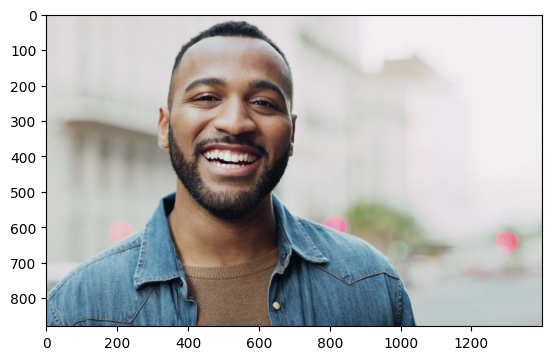

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
# Dodgy script
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # Load data to open cv and Match path
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            # if the image does not exist in path
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list data/happy/220px-Happy_People_A_Year_in_the_Taiga_poster.jpg
Image not in ext list data/happy/handsome-happy-african-american-bearded-260nw-2460702995.jpg
Image not in ext list data/happy/220px-Shiny_Happy_People_Duggar_Family_Secrets_poster.jpg
Image not in ext list data/happy/depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
Image not in ext list data/happy/businesswoman-giving-high-five-male-260nw-2226244055.jpg
Image not in ext list data/happy/smiling-young-african-american-woman-260nw-2290057229.jpg
Image not in ext list data/happy/smiling-woman_W6GFOSFAXA.jpg
Image not in ext list data/happy/group-happy-people-isolated-over-600w-102307264.jpg
Image not in ext list data/sad/sad-person-pictures-1920-x-1110-ycv2h9n0pk9g5x7e.jpg
Image not in ext list data/sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in ext list data/sad/2ef1f06810af48f9a1219d098156eee9.webp
Image not in ext list data/sad/portrait-sad-man-

### 1.4. Load Datasets

In [11]:
# Listing documentation
tf.data.Dataset??
tf.keras.utils.image_dataset_from_directory??

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
# building Image dataset
data = tf.keras.utils.image_dataset_from_directory('data')

Found 250 files belonging to 2 classes.


In [14]:
# convert data to numpy_iterator by accessing generator by allowing us to loop through the data
data_iterator = data.as_numpy_iterator()

In [15]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7a7b5b45f610>)

In [16]:
# Get new batches
batch = data_iterator.next()

In [17]:
# Image rep as numpy array
batch[0].shape

(32, 256, 256, 3)

In [18]:
batch[1]

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int32)

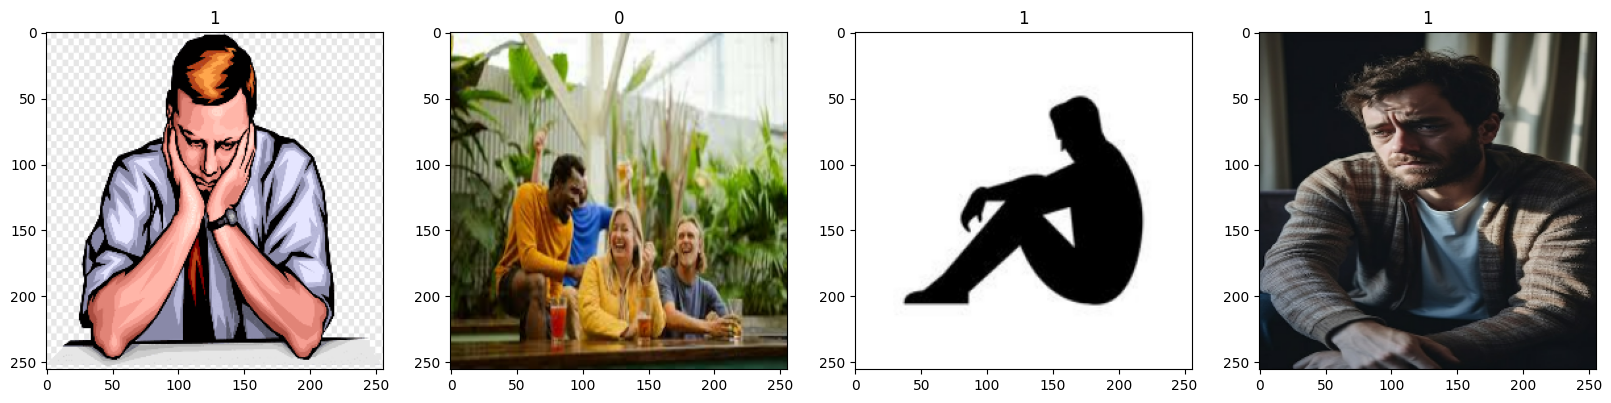

In [19]:
# check which flag is assigned to what images i.e sad=1, happy=0
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2 Data Processing

### 2.1. Scale Data

In [20]:
# x, y: These represent the image data and its label, respectively, for each element in the dataset.
# x/255: This part performs the scaling. Image data is typically represented by pixel values ranging from 0 to 255. Dividing by 255 scales
data = data.map(lambda x,y: (x/255, y))

In [21]:
# generating set of new updated images
scaled_iterator = data.as_numpy_iterator()

In [22]:
scaled_batch = scaled_iterator.next()

In [23]:
scaled_batch[0].shape

(32, 256, 256, 3)

In [24]:
scaled_batch[1]

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int32)

In [25]:
scaled_batch[0].min()

0.0

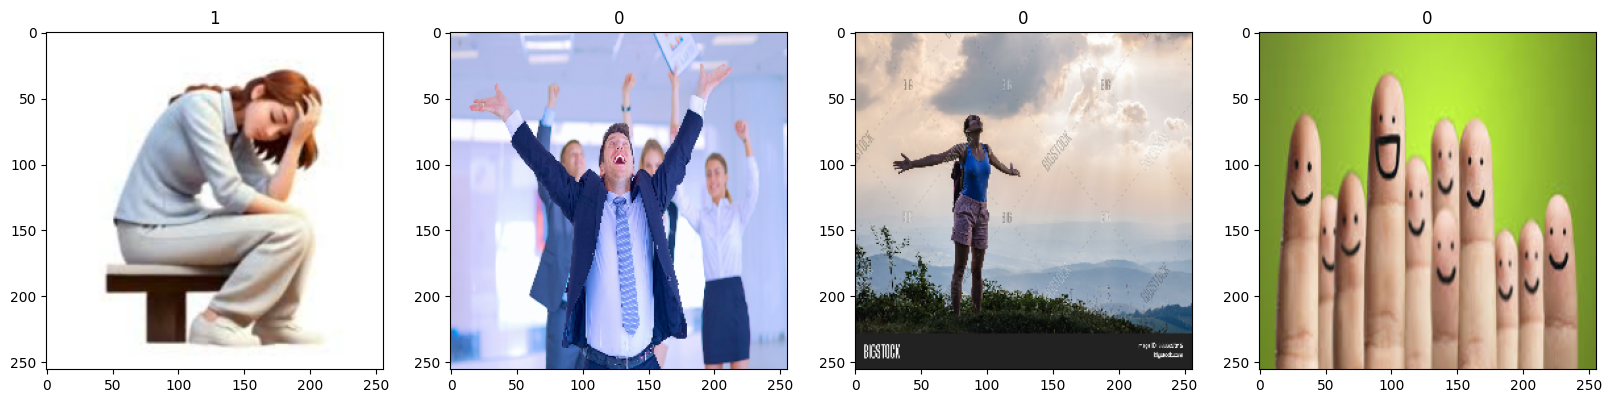

In [26]:
# check which flag is assigned to what images i.e sad=1, happy=0
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(scaled_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(scaled_batch[1][idx])

### 2.2. Split Data

In [27]:
len(data)

8

In [28]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [29]:
# Take defines how many batches are allocated
# skip skips bacthes cllocated to training partition
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [30]:
len(test)

1

## 3. Deep Model

### 3.1. Building Model

In [31]:
# Install the latest version of TensorFlow (includes GPU support in Colab)
!pip install -U tensorflow

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

### 3.2. Train

### 3.3. Plot Perfomance